In [1]:
import pandas as pd
import numpy as np
from pyentrp import entropy as ent
#https://github.com/nikdon/pyEntropy
from sklearn.metrics.cluster import normalized_mutual_info_score
#http://scikit-learn.org/stable/modules/generated/sklearn.metrics.normalized_mutual_info_score.html#sklearn.metrics.normalized_mutual_info_score
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('C:\Users\John\Documents\GitHub\dissertation\ROP_alldata.csv', index_col=0)
df.index = pd.to_datetime(df.index)
#Phases:
# PRE, ED1, ED2, ED3, DURING, AFTER

In [3]:
df1 = df.loc[df['ID'] == 13]
df2 = df.loc[df['ID'] == 31]

In [4]:
def initialize_df(df):

    df_a = df.loc[df['Phase'] == 'PRE'].iloc[-1800:].dropna() #before eyedrops
    df_b = df.loc[df['Phase'] == 'ED1'].dropna() #1st deyedrop
    df_c = df.loc[df['Phase'] == 'ED2'].dropna()
    df_d = df.loc[df['Phase'] == 'ED3'].dropna()
    df_e = df.loc[df['Phase'] == 'DURING'].dropna()
    df_f = df.loc[df['Phase'] == 'AFTER'].iloc[0:1800].dropna()
    df_g = df.loc[df['Phase'] == 'AFTER'].iloc[1800:3600].dropna()
    df_h = df.loc[df['Phase'] == 'AFTER'].iloc[3600:5400].dropna()
    df_i = df.loc[df['Phase'] == 'AFTER'].iloc[5400:7200].dropna()
    df_j = df.loc[df['Phase'] == 'AFTER'].iloc[7200:9000].dropna()
    df_k = df.loc[df['Phase'] == 'AFTER'].iloc[9000:10800].dropna()
    
    dflst = [df_a, df_b, df_c, df_d, df_e, df_f, df_g, df_h, df_i, df_j, df_k]
    
    df_final = pd.DataFrame(columns=['HR Shan En', 'StO2 Shan En', 'SpO2 Shan En', 'FTOE Shan En',
                                     'HR Samp En', 'StO2 Samp En', 'SpO2 Samp En', 'FTOE Samp En',
                                     'MI HRxFTOE', 'MI SpO2xStO2'])
    
    shanen_HR = []
    shanen_ST = []
    shanen_SP = []
    shanen_FT = []
    
    sampen_HR = []
    sampen_ST = []
    sampen_SP = []
    sampen_FT = []
    
    mi_hr_ftoe = []
    mi_sp_st = []
    
    for i in dflst:
        shanen_HR.append(ent.shannon_entropy(i['HR']))
        shanen_ST.append(ent.shannon_entropy(i['StO2']))
        shanen_SP.append(ent.shannon_entropy(i['SpO2']))
        shanen_FT.append(ent.shannon_entropy(i['FTOE']))
        
        #m = 2, r = 0.2*std
        sampen_HR.append(ent.sample_entropy(i['HR'], 2, 0.2*np.std(i['HR']))[0])
        sampen_ST.append(ent.sample_entropy(i['StO2'], 2, 0.2*np.std(i['StO2']))[0])
        sampen_SP.append(ent.sample_entropy(i['SpO2'], 2, 0.2*np.std(i['SpO2']))[0])
        sampen_FT.append(ent.sample_entropy(i['FTOE'], 2, 0.2*np.std(i['FTOE']))[0])
        
        #normalized mutual information score
        mi_hr_ftoe.append(normalized_mutual_info_score(i['HR'], i['FTOE']))
        mi_sp_st.append(normalized_mutual_info_score(i['SpO2'], i['StO2']))
        
    df_final['HR Shan En'] = shanen_HR
    df_final['StO2 Shan En'] = shanen_ST
    df_final['SpO2 Shan En'] = shanen_SP
    df_final['FTOE Shan En'] = shanen_FT
    
    df_final['HR Samp En'] = sampen_HR
    df_final['StO2 Samp En'] = sampen_ST
    df_final['SpO2 Samp En'] = sampen_SP
    df_final['FTOE Samp En'] = sampen_FT
    
    df_final['MI HRxFTOE'] = mi_hr_ftoe
    df_final['MI SpO2xStO2'] = mi_sp_st
    
    return df_final

In [5]:
%%time

dff1 = initialize_df(df1) 
dff2 = initialize_df(df2) 

Wall time: 22min 34s


In [10]:
#Zip up the dataframes according to neonate
def zip_dataframes(var):
    dff = pd.DataFrame(columns=['Neonate 1', 'Neonate 2'])
    dff['Neonate 1'] = dff1[var]
    dff['Neonate 2'] = dff2[var]
    dff.index = ['PRE', 'ED1', 'ED2', 'ED3', 'DUR', '1 H', '2 H', '3 H', '4 H', '5 H', '6 H']
    
    dff.plot.bar()
    plt.legend(loc='lower left')
    plt.title(var)
    
    if 'Shan' in var:
        plt.ylabel('bits') #Calculation uses log2     
    elif 'Samp' in var:
        plt.ylabel('nats') #Calulcation uses natural log
    else:
        plt.ylabel('Normalized Mutual Information')
    
    plt.savefig('C:\Users\John\Documents\GitHub\dissertation\plots\\' + var + '.png', dpi=300)
    
    return dff

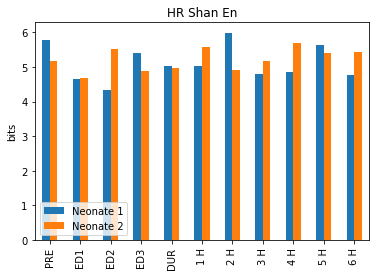

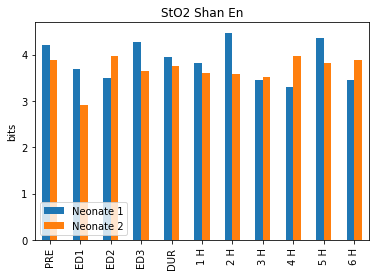

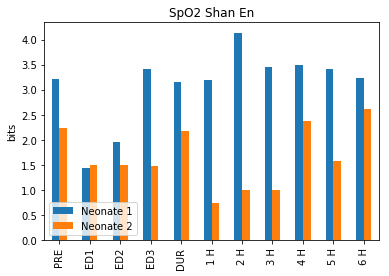

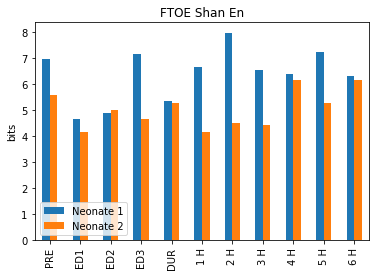

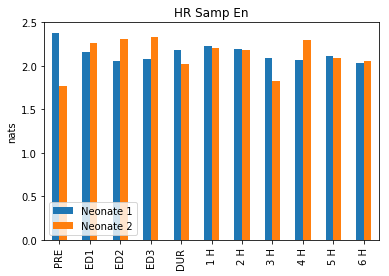

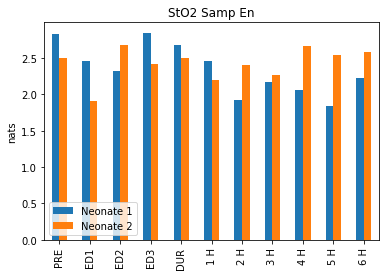

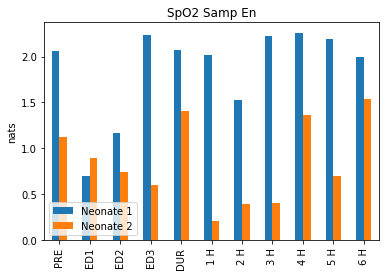

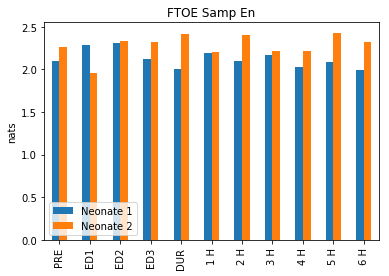

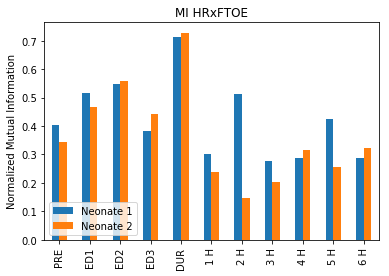

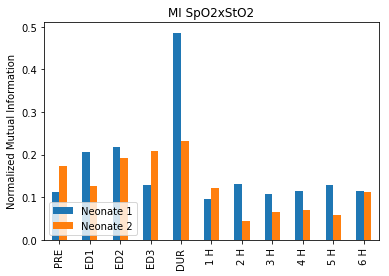

In [12]:
df_HR_shanen = zip_dataframes('HR Shan En')
df_ST_shanen = zip_dataframes('StO2 Shan En')
df_SP_shanen = zip_dataframes('SpO2 Shan En')
df_FT_shanen = zip_dataframes('FTOE Shan En')

df_HR_sampen = zip_dataframes('HR Samp En')
df_ST_sampen = zip_dataframes('StO2 Samp En')
df_SP_sampen = zip_dataframes('SpO2 Samp En')
df_FT_sampen = zip_dataframes('FTOE Samp En')

df_MI_HRxFTOE = zip_dataframes('MI HRxFTOE')
df_MI_SpO2xStO2 = zip_dataframes('MI SpO2xStO2')